In [1]:
#import libraries
import numpy as np
import pandas as pd
import statistics as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
#simulation of data
pinapple_juice = np.random.uniform(2,500,1000).round()

#mean
print(pinapple_juice.mean())
print(stats.mean(pinapple_juice))

#median
print(stats.median(pinapple_juice))

#mode
print(stats.mode(pinapple_juice))

#standard deviation
print(stats.stdev(pinapple_juice))

#range of the data
def range_data(data):
  a = max(data) - min(data)
  return a

print(range_data(pinapple_juice))

#variance
print(stats.variance(pinapple_juice))

251.736
251.736
255.0
297.0
142.1606836082465
497.0
20209.659963963964


In [3]:
#percentile
print(np.percentile(pinapple_juice,25))
print(np.percentile(pinapple_juice,50))
print(np.percentile(pinapple_juice,75))

129.0
255.0
374.0


In [4]:
#correlation
cars = pd.read_csv("cars.csv")
print(cars.info())
print(cars.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      428 non-null    object 
 1   sports_car                428 non-null    bool   
 2   suv                       428 non-null    bool   
 3   wagon                     428 non-null    bool   
 4   minivan                   428 non-null    bool   
 5   pickup                    428 non-null    bool   
 6   all_wheel                 428 non-null    bool   
 7   rear_wheel                428 non-null    bool   
 8   Price                     428 non-null    int64  
 9   Dealer_Cost               428 non-null    int64  
 10  Engine_size               428 non-null    float64
 11  cylenders                 428 non-null    int64  
 12  horsepower                428 non-null    int64  
 13  city_miles_per_galloon    414 non-null    float64
 14  highway_mi

In [5]:
cars.head(5)

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,Price,Dealer_Cost,Engine_size,cylenders,horsepower,city_miles_per_galloon,highway_miles_per_Gallon,weight,base_wheeel,length,width
0,Chevrolet Aveo 4dr,False,False,False,False,False,False,False,11690,10965,1.6,4,103,28.0,34.0,2370.0,98.0,167.0,66.0
1,Chevrolet Aveo LS 4dr hatch,False,False,False,False,False,False,False,12585,11802,1.6,4,103,28.0,34.0,2348.0,98.0,153.0,66.0
2,Chevrolet Cavalier 2dr,False,False,False,False,False,False,False,14610,13697,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0
3,Chevrolet Cavalier 4dr,False,False,False,False,False,False,False,14810,13884,2.2,4,140,26.0,37.0,2676.0,104.0,183.0,68.0
4,Chevrolet Cavalier LS 2dr,False,False,False,False,False,False,False,16385,15357,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0


In [6]:
cars_correlation = cars.loc[:,["horsepower","city_miles_per_galloon"]]
cars_correlation.corr()

,horsepower,city_miles_per_galloon
horsepower,1.000000,-0.666256
city_miles_per_galloon,-0.666256,1.000000


In [7]:
cars.loc[:,["Price","horsepower","city_miles_per_galloon","weight","length"]].corr()

,Price,horsepower,city_miles_per_galloon,weight,length
Price,1.000000,0.826945,-0.461130,0.449336,0.214889
horsepower,0.826945,1.000000,-0.666256,0.631525,0.379936
city_miles_per_galloon,-0.461130,-0.666256,1.000000,-0.737192,-0.464826
weight,0.449336,0.631525,-0.737192,1.000000,0.667169
length,0.214889,0.379936,-0.464826,0.667169,1.000000


In [8]:
cars_clean = cars.dropna(axis=0)
cars_clean.shape

(387, 19)

In [9]:
corr_data = cars_clean.loc[:,["Price","horsepower","city_miles_per_galloon","weight","length"]].corr()

<Axes: >

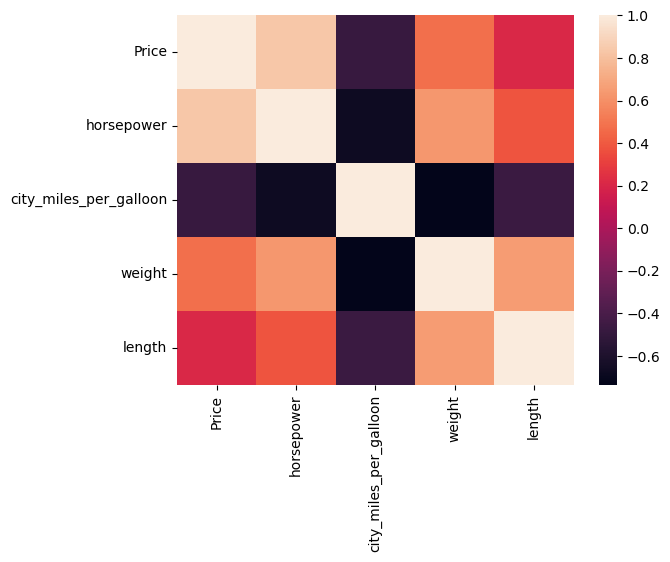

In [10]:
sns.heatmap(corr_data)

In [11]:
price = cars["Price"]

first_percentile = np.percentile(price,25)
print(f"First percentile is {first_percentile}")

third_pecentile = np.percentile(price,75)
print(f"Third percentile is {third_pecentile}")

IQR = third_pecentile - first_percentile

First percentile is 20334.25
Third percentile is 39205.0


In [12]:
def check_outlier(price):
  cars["check_outlier"]=np.nan
  for i in range (0,len(price)):
    if price[i] <= first_percentile - IQR*1.5: cars["check_outlier"][i] = "low outlier"
    elif price[i] >= third_pecentile + IQR*1.5: cars["check_outlier"][i] = "high outlier"
    else: cars["check_outlier"][i] = "normal"

check_outlier(price)

C:\Users\thanh\AppData\Local\Temp\ipykernel_17504\1971744299.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else: cars["check_outlier"][i] = "normal"
C:\Users\thanh\AppData\Local\Temp\ipykernel_17504\1971744299.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'normal' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  else: cars["check_outlier"][i] = "normal"


In [13]:
cars["check_outlier"].value_counts()
print(cars.head(5))
print(cars.shape)

                          name  sports_car    suv  wagon  minivan  pickup  \
0           Chevrolet Aveo 4dr       False  False  False    False   False   
1  Chevrolet Aveo LS 4dr hatch       False  False  False    False   False   
2       Chevrolet Cavalier 2dr       False  False  False    False   False   
3       Chevrolet Cavalier 4dr       False  False  False    False   False   
4    Chevrolet Cavalier LS 2dr       False  False  False    False   False   

   all_wheel  rear_wheel  Price  Dealer_Cost  Engine_size  cylenders  \
0      False       False  11690        10965          1.6          4   
1      False       False  12585        11802          1.6          4   
2      False       False  14610        13697          2.2          4   
3      False       False  14810        13884          2.2          4   
4      False       False  16385        15357          2.2          4   

   horsepower  city_miles_per_galloon  highway_miles_per_Gallon  weight  \
0         103                

In [14]:
cars_no_outlier = cars[cars["check_outlier"]=="normal"]
print(cars_no_outlier.head(5))
print(cars_no_outlier.shape)

                          name  sports_car    suv  wagon  minivan  pickup  \
0           Chevrolet Aveo 4dr       False  False  False    False   False   
1  Chevrolet Aveo LS 4dr hatch       False  False  False    False   False   
2       Chevrolet Cavalier 2dr       False  False  False    False   False   
3       Chevrolet Cavalier 4dr       False  False  False    False   False   
4    Chevrolet Cavalier LS 2dr       False  False  False    False   False   

   all_wheel  rear_wheel  Price  Dealer_Cost  Engine_size  cylenders  \
0      False       False  11690        10965          1.6          4   
1      False       False  12585        11802          1.6          4   
2      False       False  14610        13697          2.2          4   
3      False       False  14810        13884          2.2          4   
4      False       False  16385        15357          2.2          4   

   horsepower  city_miles_per_galloon  highway_miles_per_Gallon  weight  \
0         103                

In [15]:
pricing = pd.read_excel("pricing.xlsx")
pricing.head()

,Demand,Price
0,400,10.0
1,380,12.0
2,370,13.0
3,390,11.0
4,395,10.5


In [16]:
X = pricing["Price"].values.reshape(-1,1)
print(X)
Y = pricing["Demand"]
print(Y)

[[10. ]
 [12. ]
 [13. ]
 [11. ]
 [10.5]
 [ 9. ]
 [ 7. ]
 [ 8.8]
 [13. ]]
0    400
1    380
2    370
3    390
4    395
5    410
6    430
7    412
8    370
Name: Demand, dtype: int64


In [17]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [18]:
print(model.coef_)
print(model.intercept_)

[-10.]
500.0


In [19]:
pricing["forecast"]=model.predict(X)
pricing

,Demand,Price,forecast
0,400,10.0,400.0
1,380,12.0,380.0
2,370,13.0,370.0
3,390,11.0,390.0
4,395,10.5,395.0
5,410,9.0,410.0
6,430,7.0,430.0
7,412,8.8,412.0
8,370,13.0,370.0


In [20]:
#Chi-square test
from scipy.stats import norm,normaltest,kstest
import scipy.stats as st

In [21]:
skus = pd.read_csv("sku_distributions.csv")
skus.head(5)

,day,grape_juice,cantalop_juice,apple_juice
0,1,0,10,96
1,2,3,10,92
2,3,1,9,84
3,4,2,10,113
4,5,1,10,65


In [22]:
dist_name = ["norm","exponweib","weibull_max","weibull_min","pareto"]

In [23]:
apple_juice = np.array(skus["apple_juice"])
mean = apple_juice.mean()
sd = apple_juice.std()

In [24]:
kstest(apple_juice,"norm",args=(mean,sd))

KstestResult(statistic=0.04011911785947586, pvalue=0.6423077067552097, statistic_location=100, statistic_sign=1)

In [25]:
results = []
parameters = {}
norm_param = getattr(st, "norm")
norm_param.fit(apple_juice)

(100.73873873873873, 20.190256493370235)

In [26]:
for dist in dist_name:
  param = getattr(st, dist)
  fitting = param.fit(apple_juice)
  test = kstest(apple_juice, dist,args = fitting)
  results.append([dist,test])
  print("the results for dist"+dist+"is"+str(test[1]))

the results for distnormis0.6423077067552097
the results for distexponweibis1.1842591378527938e-172
the results for distweibull_maxis2.2685136143704807e-247
the results for distweibull_minis0.34810501680216566
the results for distparetois1.6172750367237283e-31


D:\Anaconda\Lib\site-packages\scipy\stats\_continuous_distns.py:2008: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
